# EDA

Importando librerias que necesitaremos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from wordcloud import WordCloud
sns.set()


Matplotlib is building the font cache; this may take a moment.


Procesado y lectura  del json como dataframe

In [2]:
rows = []
with open('steam_games.json') as f:
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

In [3]:
df = pd.DataFrame(rows)

Columnas

In [4]:
df.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access', 'id', 'developer', 'sentiment', 'metascore'],
      dtype='object')

Informacion basica

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  object 
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(14)
memory usage: 3.7+ MB


Columnas que considero innecesarias

In [6]:
df.drop(columns=['url', 'reviews_url', 'app_name', 'tags', 'developer'], inplace=True)

In [7]:
df

,publisher,genres,title,release_date,discount_price,specs,price,early_access,id,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.49,[Single-player],4.99,False,761140,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.83,[Single-player],0.99,False,767400,NaN,NaN
4,NaN,NaN,NaN,NaN,1.79,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,1.49,"[Single-player, Steam Achievements]",1.99,False,773640,NaN,NaN
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,4.24,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,NaN,NaN
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,NaN
32133,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,2017-09-02,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,1 user reviews,NaN


Eliminamos duplicados

In [8]:
df[df.duplicated(keep=False, subset='id')].sort_values(by='id')

,publisher,genres,title,release_date,discount_price,specs,price,early_access,id,sentiment,metascore
13894,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,2017-10-26,NaN,"[Single-player, Steam Achievements, Full contr...",59.99,False,612880,Mostly Positive,86
14573,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,2017-10-26,NaN,"[Single-player, Steam Achievements, Full contr...",59.99,False,612880,Mostly Positive,86
74,NaN,NaN,NaN,NaN,14.99,NaN,19.99,False,NaN,NaN,NaN
30961,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,2012-09-07,NaN,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,NaN,Overwhelmingly Positive,91


Cuenta de valores nulos

In [9]:
df.isna().sum().sort_values(ascending = False)

discount_price    31910
metascore         29458
publisher          8052
sentiment          7182
genres             3283
release_date       2067
title              2050
price              1377
specs               670
id                    2
early_access          0
dtype: int64

Mostramos la cantidad de valores nulos en cada columna

In [10]:
print(df.isnull().sum())

publisher          8052
genres             3283
title              2050
release_date       2067
discount_price    31910
specs               670
price              1377
early_access          0
id                    2
sentiment          7182
metascore         29458
dtype: int64


Verificamos tamaño de mi dataset

In [11]:
df.shape

(32135, 11)

Elimino valores nulos que considero que sera necesario para el ml

In [12]:
df = df.dropna(subset=['price'])
df = df.dropna(subset=['release_date'])
df = df.dropna(subset=['early_access'])
df = df.dropna(subset=['metascore'])


Resultado

In [13]:
df.shape

(2598, 11)

Descripcion de columnas que me parecen interesantes

In [14]:
print(df['price'].describe())

count     2598.00
unique      48.00
top          9.99
freq       703.00
Name: price, dtype: float64


In [15]:
print(df['discount_price'].describe())

count    3.000000
mean     3.240000
std      2.185749
min      0.740000
25%      2.465000
50%      4.190000
75%      4.490000
max      4.790000
Name: discount_price, dtype: float64


Valores unicos para price

In [16]:
df['price'].unique()

array([9.99, 6.99, 39.99, 'Free', 4.99, 19.99, 7.49, 14.99, 8.99, 12.99,
       5.99, 7.99, 2.99, 2.49, 15.99, 1.99, 29.99, 'Free to Play', 24.99,
       0.99, 18.99, 11.99, 13.99, 3.99, 'Play for Free!', 14.95, 59.99,
       13.98, 49.99, 34.99, 17.99, 10.99, 44.99, 16.99, 'Free To Play',
       26.99, 4.68, 19.95, 99.99, 87.94, 20.99, 12.89, 1.0, 12.0, 13.37,
       15.0, 59.95, 54.99], dtype=object)

Puedo observar que hay datos que no parecen tener relacion con el nombre de la columna , por lo que voy a cambiarlos a 0 

In [17]:
df['price'] = df['price'].where(~df['price'].apply(lambda x: isinstance(x, str)), 0)

Resultado

In [18]:
df['price'].unique()

array([9.99, 6.99, 39.99, 0, 4.99, 19.99, 7.49, 14.99, 8.99, 12.99, 5.99,
       7.99, 2.99, 2.49, 15.99, 1.99, 29.99, 24.99, 0.99, 18.99, 11.99,
       13.99, 3.99, 14.95, 59.99, 13.98, 49.99, 34.99, 17.99, 10.99,
       44.99, 16.99, 26.99, 4.68, 19.95, 99.99, 87.94, 20.99, 12.89, 1.0,
       12.0, 13.37, 15.0, 59.95, 54.99], dtype=object)

Creare una columna 'release_year' para mi modelo

In [19]:
# Convertierto la columna 'release_date' en una serie de tipo datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')

# Elimino las filas con valores NaN en la columna 'release_date'
df = df.dropna(subset=['release_date'])

# Extraigo el año de la columna 'release_date'
df['release_year'] = df['release_date'].dt.year

In [20]:
df

,publisher,genres,title,release_date,discount_price,specs,price,early_access,id,sentiment,metascore,release_year
28,Valve,[Action],Half-Life,1998-11-08,NaN,"[Single-player, Multi-player, Valve Anti-Cheat...",9.99,False,70,Overwhelmingly Positive,96,1998
39,Strategy First,[Strategy],Disciples II: Gallean's Return,2006-07-06,NaN,"[Single-player, Multi-player, Co-op]",6.99,False,1640,Mostly Positive,84,2006
40,Strategy First,[Strategy],Disciples II: Rise of the Elves,2006-07-06,NaN,"[Single-player, Multi-player, Co-op]",6.99,False,1630,Very Positive,80,2006
41,Blazing Griffin Ltd.,"[Action, Indie, RPG]",The Ship: Murder Party,2006-07-11,NaN,"[Single-player, Multi-player, Steam Trading Ca...",9.99,False,2400,Very Positive,76,2006
55,Majesco,[Action],Advent Rising,2005-08-09,NaN,"[Single-player, Steam Trading Cards]",9.99,False,3800,Mostly Positive,70,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
32109,Valve,[Action],Half-Life: Blue Shift,2001-06-01,NaN,[Single-player],4.99,False,130,Very Positive,71,2001
32112,2K,"[Action, Adventure]",Mafia,2002-08-28,NaN,[Single-player],14.99,False,40990,Overwhelmingly Positive,88,2002
32114,Valve,[Action],Day of Defeat,2003-05-01,NaN,"[Multi-player, Valve Anti-Cheat enabled]",4.99,False,30,Very Positive,79,2003
32116,"Epic Games, Inc.",[Action],Unreal Tournament 2004: Editor's Choice Edition,2004-03-16,NaN,"[Single-player, Multi-player, Steam Trading Ca...",14.99,False,13230,Overwhelmingly Positive,93,2004


Eliminamos outliers

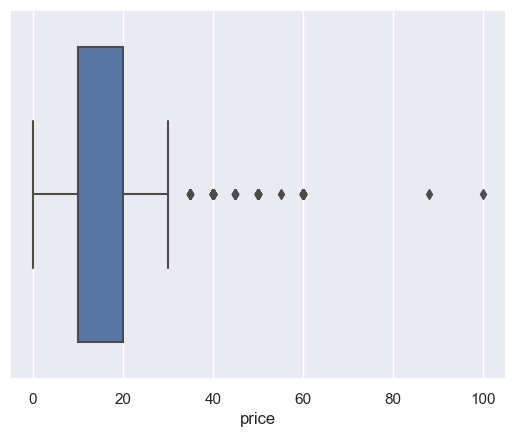

In [21]:
column = 'price'
sns.boxplot(x=df[column])
plt.show()

In [22]:
# Calculo el IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Defino los limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtro valores atípicos
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Valores atípicos
print(outliers)

# Eliminamos valores atípicos
df = df.drop(outliers.index)

                                               publisher  \
59                                                SimBin   
548                                           Activision   
855                                  Paradox Interactive   
1178                                          Activision   
1945                        Konami Digital Entertainment   
...                                                  ...   
30869                                         Activision   
30936                             Stardock Entertainment   
31095                                  Microsoft Studios   
31452             Warner Bros. Interactive Entertainment   
31749  Konami Digital Entertainment, Inc., Konami Dig...   

                            genres                                     title  \
59                        [Racing]                      RACE - The WTCC Game   
548                       [Action]                  Call of Duty®: Black Ops   
855    [RPG, Simulation, Strategy]     

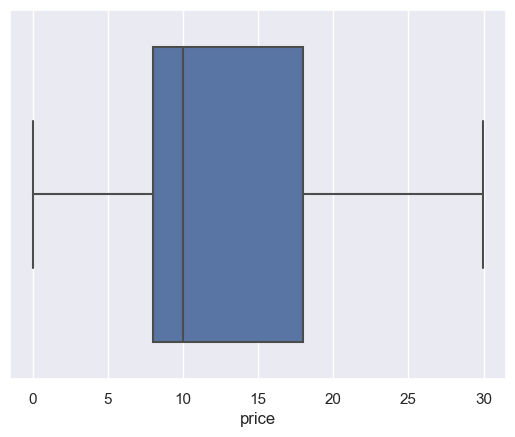

In [23]:
column = 'price'
sns.boxplot(x=df[column])
plt.show()

Visualizamos la distribución de las variables numéricas

c:\Users\FrancoExequielAguile\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
c:\Users\FrancoExequielAguile\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
c:\Users\FrancoExequielAguile\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


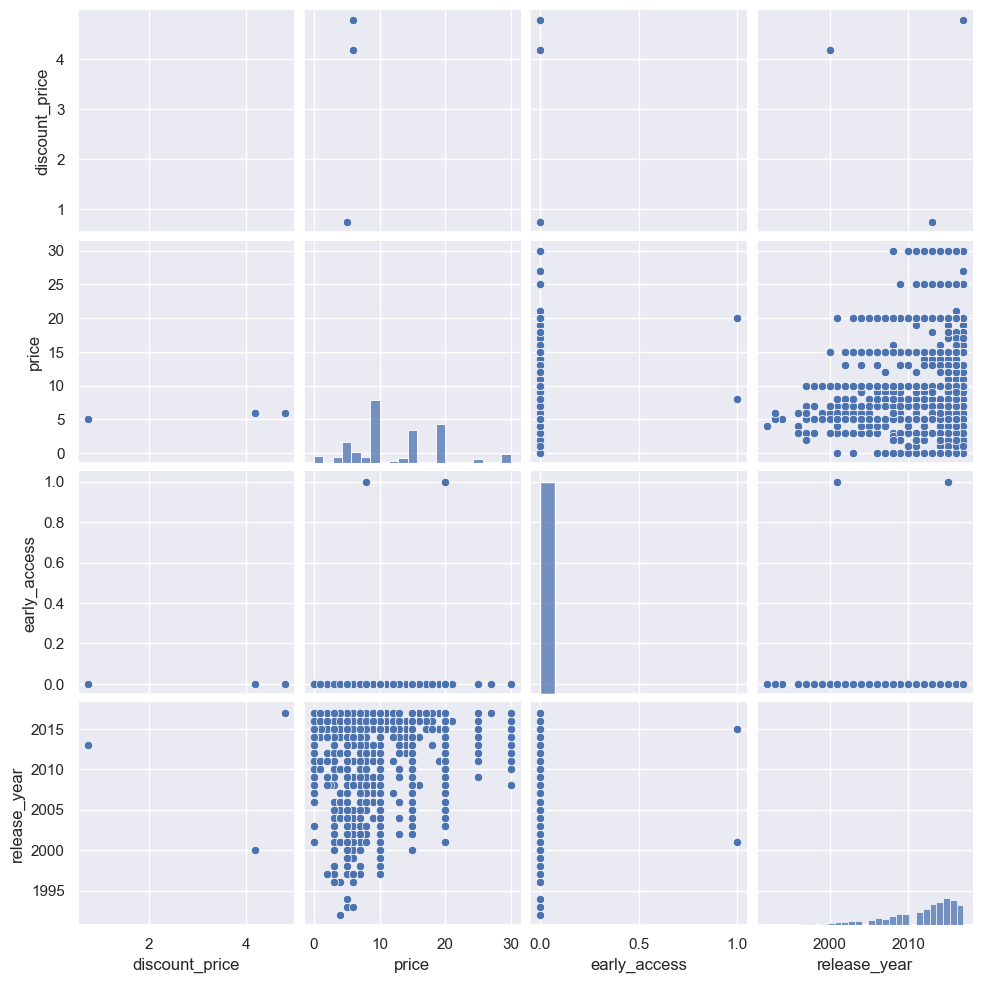

In [24]:
sns.pairplot(df)
plt.show()

Visualizamos la distribución de 'discount_price' y 'price'

C:\Users\FrancoExequielAguile\AppData\Local\Temp\ipykernel_3500\2134462181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['discount_price'])


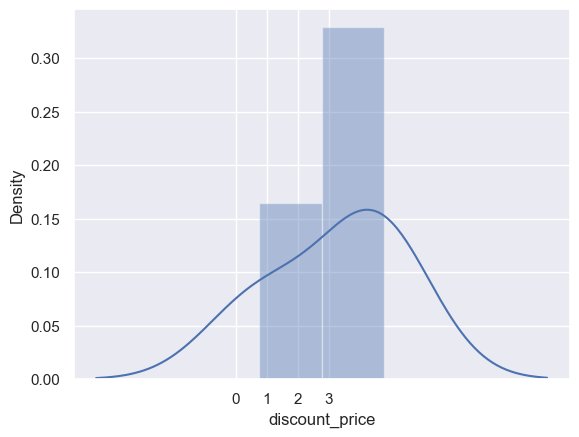

In [25]:
ax = sns.distplot(df['discount_price'])
ax.set_xticks(range(0, int(df['discount_price'].max()), 1))
plt.show()

C:\Users\FrancoExequielAguile\AppData\Local\Temp\ipykernel_3500\3379191857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['price'])


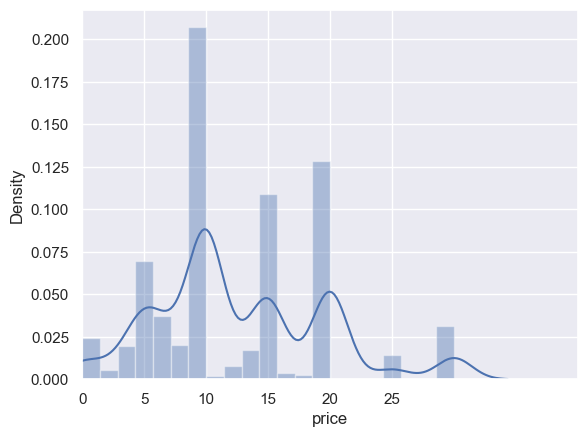

In [26]:
ax = sns.distplot(df['price'])
ax.set_xticks(range(0, int(df['price'].max()), 5))
ax.set_xlim(0, 40)
plt.show()

Grafico de dispersion

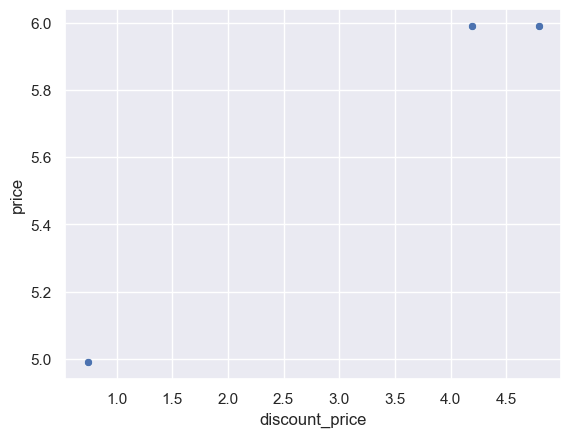

In [27]:
x_column = 'discount_price'
y_column = 'price'
sns.scatterplot(data=df, x=x_column, y=y_column)
plt.show()


Creamos un dataframe con los generos ya que se encuentran anidados en listas y queremos crear una nube de palabras para poder ver cuales son los generos que mas se repiten

In [28]:
words = df['genres'].explode().dropna()

# Conteo de frecuencia de cada palabra
word_counts = Counter(words)

# Creo dataframe con sus palabras y frecuencias
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count']).reset_index().rename(columns={'index':'word'})

# Ordeno el DataFrame por frecuencia de palabra
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

# Resultado
print(word_counts_df)

                     word  count
2                   Indie   1195
0                  Action   1158
6               Adventure    875
1                Strategy    635
3                     RPG    453
4              Simulation    295
5                  Casual    257
7                  Racing     86
10           Free to Play     67
8                  Sports     58
9   Massively Multiplayer     50
11           Early Access      2
12       Video Production      1


Utilizo este data frame para hacer la nube 

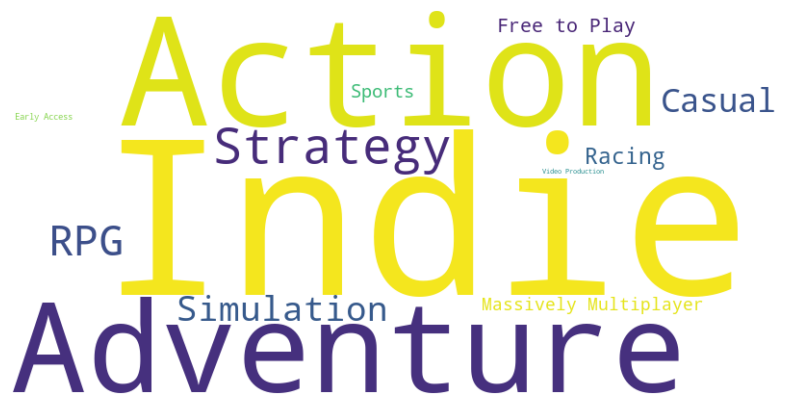

In [29]:

word_counts = dict(zip(word_counts_df['word'], word_counts_df['count']))

# Creo la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# Nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Salvamos el dataframe en csv para el ML

In [30]:
df.shape

(2452, 12)

In [31]:
df.to_csv('steam_games.csv', index=False)
